In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
k3 = pd.read_csv("k3.csv", delimiter=',', index_col=0)
k3

,X602.3564453125,X603.37890625,X604.304077148438,X617.353271484375,X618.327087402344,X619.349609375,X620.3720703125,X621.345886230469,X628.357421875,X630.402465820313,...,X3199.8271484375,X3199.8759765625,X3199.92456054688,X3199.97314453125,X3200.02197265625,ClassLabel.x,ClassLabel.y,x,y,SubjectID
Spot,,,,,,,,,,,,,,,,,,,,,
1,4.720787,3.302430,4.204435,3.872975,5.090248,3.606773,4.492374,4.067746,4.196156,3.506724,...,2.643764,2.518402,2.518261,2.667812,2.731848,pRCC,tumor,7514.742188,13351.301758,1
2,3.898122,3.200102,3.529946,3.143654,5.188971,3.590741,4.057035,3.787821,3.579146,3.241751,...,2.734436,2.616422,2.663902,2.705975,2.684825,pRCC,tumor,7514.742188,13301.301758,1
3,3.750701,3.223467,3.462467,2.981039,3.291554,3.092168,3.073406,2.931267,2.999407,2.962364,...,2.741512,2.649171,2.660443,2.787239,2.787239,pRCC,tumor,7514.742188,13251.301758,1
4,4.465696,3.790386,4.095252,4.099470,5.590768,3.713906,4.394215,3.980107,4.374478,3.324224,...,2.742518,2.621311,2.521755,2.446548,2.497686,pRCC,tumor,7514.742188,13201.301758,1
5,4.782802,4.243376,3.921438,3.879630,6.337270,3.868236,4.856074,4.163009,4.103454,3.564029,...,2.581821,2.842464,2.689532,2.482096,2.732600,pRCC,tumor,7564.742188,13551.301758,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53589,3.279795,2.828248,3.983112,3.850555,3.885840,2.969889,2.967163,3.142593,3.950088,3.483189,...,2.552588,2.603445,2.603445,2.603445,2.603445,ccRCC,normal,26864.742188,13751.301758,3
53590,3.010846,2.874158,2.931067,2.746162,2.859635,2.763003,2.828060,2.885375,2.761697,2.983948,...,2.791989,2.737074,2.704754,2.715585,2.971884,ccRCC,normal,26864.742188,13701.301758,3
53591,2.788642,2.673068,2.967275,2.709992,2.867970,2.840356,2.971231,2.858070,2.661962,2.877924,...,2.639674,2.646987,2.729980,2.801889,2.801889,ccRCC,normal,26864.742188,13651.301758,3


In [3]:
#Leave out aml tumor type that is not going to be analyzed
select = ['ccRCC', 'pRCC', 'chRCC', 'onc'] 
spectra = k3.loc[k3['ClassLabel.x'].isin(select)] 
spectra

,X602.3564453125,X603.37890625,X604.304077148438,X617.353271484375,X618.327087402344,X619.349609375,X620.3720703125,X621.345886230469,X628.357421875,X630.402465820313,...,X3199.8271484375,X3199.8759765625,X3199.92456054688,X3199.97314453125,X3200.02197265625,ClassLabel.x,ClassLabel.y,x,y,SubjectID
Spot,,,,,,,,,,,,,,,,,,,,,
1,4.720787,3.302430,4.204435,3.872975,5.090248,3.606773,4.492374,4.067746,4.196156,3.506724,...,2.643764,2.518402,2.518261,2.667812,2.731848,pRCC,tumor,7514.742188,13351.301758,1
2,3.898122,3.200102,3.529946,3.143654,5.188971,3.590741,4.057035,3.787821,3.579146,3.241751,...,2.734436,2.616422,2.663902,2.705975,2.684825,pRCC,tumor,7514.742188,13301.301758,1
3,3.750701,3.223467,3.462467,2.981039,3.291554,3.092168,3.073406,2.931267,2.999407,2.962364,...,2.741512,2.649171,2.660443,2.787239,2.787239,pRCC,tumor,7514.742188,13251.301758,1
4,4.465696,3.790386,4.095252,4.099470,5.590768,3.713906,4.394215,3.980107,4.374478,3.324224,...,2.742518,2.621311,2.521755,2.446548,2.497686,pRCC,tumor,7514.742188,13201.301758,1
5,4.782802,4.243376,3.921438,3.879630,6.337270,3.868236,4.856074,4.163009,4.103454,3.564029,...,2.581821,2.842464,2.689532,2.482096,2.732600,pRCC,tumor,7564.742188,13551.301758,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53589,3.279795,2.828248,3.983112,3.850555,3.885840,2.969889,2.967163,3.142593,3.950088,3.483189,...,2.552588,2.603445,2.603445,2.603445,2.603445,ccRCC,normal,26864.742188,13751.301758,3
53590,3.010846,2.874158,2.931067,2.746162,2.859635,2.763003,2.828060,2.885375,2.761697,2.983948,...,2.791989,2.737074,2.704754,2.715585,2.971884,ccRCC,normal,26864.742188,13701.301758,3
53591,2.788642,2.673068,2.967275,2.709992,2.867970,2.840356,2.971231,2.858070,2.661962,2.877924,...,2.639674,2.646987,2.729980,2.801889,2.801889,ccRCC,normal,26864.742188,13651.301758,3


In [4]:
spectra.shape

(48801, 1667)

In [5]:
X = spectra.iloc[:,0:1662]
y=spectra['ClassLabel.y']

In [6]:
#StratifiedKFold in order to obtain test set containing both labels normal/tumor
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
for skf_train, skf_test in skf.split(X, y):
    print("%s %s" % (skf_train, skf_test))
X_train, X_test, y_train, y_test = X.iloc[skf_train], X.iloc[skf_test], y.iloc[skf_train], y.iloc[skf_test]

[ 2025  2026  2027 ... 48798 48799 48800] [   0    1    2 ... 7239 7240 7241]
[    0     1     2 ... 48798 48799 48800] [ 2025  2026  2027 ... 11032 11033 11034]
[    0     1     2 ... 48798 48799 48800] [ 4774  4775  4776 ... 14727 14728 14729]
[    0     1     2 ... 48798 48799 48800] [ 7307  7308  7309 ... 21376 21377 21378]
[    0     1     2 ... 48798 48799 48800] [17624 17625 17626 ... 26578 26579 26580]
[    0     1     2 ... 48798 48799 48800] [20120 20121 20122 ... 30274 30275 30276]
[    0     1     2 ... 48798 48799 48800] [22361 22362 22363 ... 34305 34306 34307]
[    0     1     2 ... 48798 48799 48800] [34088 34089 34090 ... 41406 41407 41408]
[    0     1     2 ... 48798 48799 48800] [36214 36215 36216 ... 45102 45103 45104]
[    0     1     2 ... 45102 45103 45104] [38396 38397 38398 ... 48798 48799 48800]


In [7]:
#Check that both train and test contain all labels
print('y_train:',y_train.value_counts())
print('y_test:',y_test.value_counts())

y_train: normal    33262
tumor     10659
Name: ClassLabel.y, dtype: int64
y_test: normal    3696
tumor     1184
Name: ClassLabel.y, dtype: int64


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
rf_clf=RandomForestClassifier(n_estimators=25)
logisticRegr = LogisticRegression(multi_class = 'multinomial')
logisticRegr_CV = LogisticRegressionCV(max_iter=200)#default=100
knn_clf = KNeighborsClassifier(n_neighbors = 36)

In [9]:
from sklearn.ensemble import RandomForestClassifier
import time
start_time = time.time()
#Create a Gaussian Classifier
rf_clf=RandomForestClassifier(n_estimators=25)

#Train the model using the training sets
rf_classifier=rf_clf.fit(X_train,y_train)

rf_predictions=rf_clf.predict(X_test)
end_time = time.time()
rf_time=end_time - start_time
print('Random Forest Classification took {:.2f} s'.format(rf_time))
import sklearn
rf_accuracy=sklearn.metrics.accuracy_score(y_test, rf_predictions)
print("RF Test accuracy:",rf_accuracy)
misclassified_rf = (y_test != rf_predictions).sum()
print('Misclassified samples with Random Forest: {}'.format(misclassified_rf))

Random Forest Classification took 128.57 s
RF Test accuracy: 0.7448770491803278
Misclassified samples with Random Forest: 1245


In [10]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()
logisticRegr = LogisticRegression(multi_class = 'multinomial')
logisticRegr.fit(X_train, y_train)
lr_predictions = logisticRegr.predict(X_test)
end_time = time.time()
lr_time=end_time - start_time
print('Logistic Regression Classification took {:.2f} s'.format(lr_time))
lr_accuracy=sklearn.metrics.accuracy_score(y_test, lr_predictions)
print("LR Test accuracy:",lr_accuracy)
misclassified_lr = (y_test != lr_predictions).sum()
print('Misclassified samples with Logistic Regression: {}'.format(misclassified_lr))

Logistic Regression Classification took 23.34 s
LR Test accuracy: 0.7581967213114754
Misclassified samples with Logistic Regression: 1180


In [11]:
#KNN Classification Model with chosen 36 neighbors
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
knn_clf = KNeighborsClassifier(n_neighbors = 36)
knn_clf.fit(X_train, y_train)
knn_predictions = knn_clf.predict(X_test)
end_time = time.time()
knn_time=end_time - start_time
print('KNN Classification took {:.2f} s'.format(knn_time))
knn_accuracy=sklearn.metrics.accuracy_score(y_test, knn_predictions)
print("KNN Test accuracy:",knn_accuracy)
misclassified_knn = (y_test != knn_predictions).sum()
print('Misclassified samples with KNN: {}'.format(misclassified_knn))

KNN Classification took 624.98 s
KNN Test accuracy: 0.7762295081967213
Misclassified samples with KNN: 1092


In [13]:
data_dict = {'Classification Model': ['Random Forest','Log. Regression', 'KNN'],
        'Running Time': [rf_time, lr_time, knn_time],
         'Accuracy':[rf_accuracy*100, lr_accuracy*100, knn_accuracy*100],
        'Missclassified Samples':[misclassified_rf, misclassified_lr, misclassified_knn]}
sup_class = pd.DataFrame(data_dict, columns = ['Classification Model','Running Time', 'Accuracy', 'Missclassified Samples' ])
sup_class

,Classification Model,Running Time,Accuracy,Missclassified Samples
0,Random Forest,128.567215,74.487705,1245
1,Log. Regression,23.341678,75.819672,1180
2,KNN,624.981017,77.622951,1092


In [14]:
#export data frame with evaluation values to excel
sup_class.to_excel(r'evaluation_TMA_sup_accuracies.xlsx', index = False)

In [5]:
ind=list(X.index)

In [93]:
#CLUSTERING with K-Means for 2 clusters
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
def kmeans_clustering_areas(area, area_indexes):
    kmeans = KMeans(n_clusters=2)
    global pred
    pred = kmeans.fit_predict(area)
    indexes=area.index
    global predictions
    predictions=pd.DataFrame(pred, columns=['Predictions'], index=indexes)
    #predictions.to_csv('O_eucl_kmeans_clustering_predictions.txt', sep='\t')
    #global kmeans_tomap
    #kmeans_tomap=predictions.join(area_indexes)
    return predictions, pred
kmeans_clustering_areas(X, ind)

(       Predictions
 Spot              
 1                1
 2                0
 3                0
 4                1
 5                1
 ...            ...
 53589            1
 53590            0
 53591            0
 53592            0
 53593            0
 
 [48801 rows x 1 columns],
 array([1, 0, 0, ..., 0, 0, 0], dtype=int32))

In [97]:
#Check Clustering accuracy
test=y.replace(['normal', 'tumor'],[0,1])
sklearn.metrics.accuracy_score(test, predictions)

0.7348619905329808

In [58]:
#merge predictions to corresponding coordinates for mapping
kmeans_tomap=pd.DataFrame(spectra.iloc[:, 1664:1666])
kmeans_tomap=kmeans_tomap.join(predictions)
kmeans_tomap

,x,y,Predictions
Spot,,,
1,7514.742188,13351.301758,1
2,7514.742188,13301.301758,0
3,7514.742188,13251.301758,0
4,7514.742188,13201.301758,1
5,7564.742188,13551.301758,1
...,...,...,...
53589,26864.742188,13751.301758,1
53590,26864.742188,13701.301758,0
53591,26864.742188,13651.301758,0


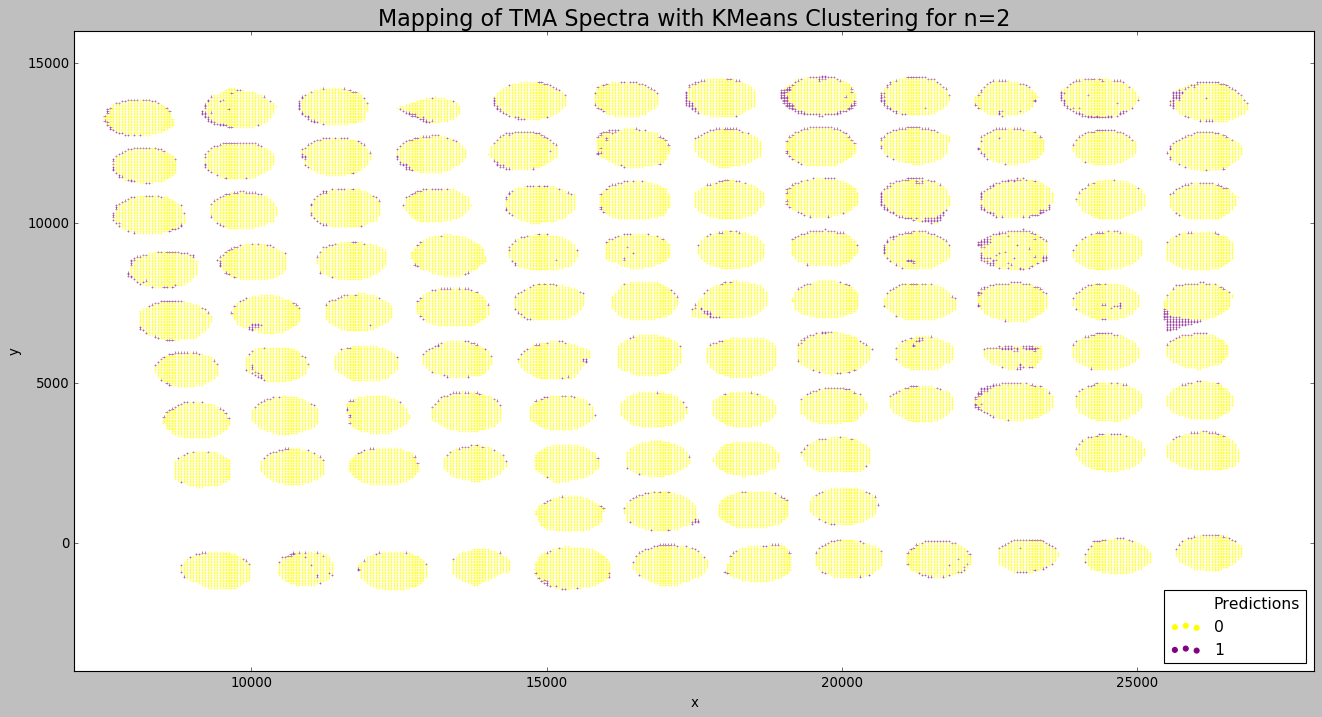

In [61]:
#plotting map with clustering predictions
import matplotlib.pyplot as plt
import seaborn as sns
def plotting_clusters(tomap):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 10)
    plt.style.use('classic')
    plt.title('Mapping of TMA Spectra with KMeans Clustering for n=2',fontsize=20)
    plt.ylim([-4000, 16000])
    plt.xlim([7000, 28000])
    #df_sample=tomap.sample(25000)
    plot=sns.scatterplot(tomap['x'], tomap['y'], hue = tomap['Predictions'], s=4, c='w',marker="+", palette=['yellow','purple'], alpha=0.6)
    plt.xlabel('x')
    plt.ylabel('y')
    ax.legend(fontsize=14, loc='lower right')
    fig = plot.get_figure()
    fig.savefig("2408_classic_n2_TMA_mapping_KMeans.pdf")
    return plt.show()
plotting_clusters(kmeans_tomap)

In [167]:
# roc curve and auc score
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.style.use('classic')
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for CV TMA Classification with KNN')
    plt.figtext(0.7, 0.2, s='AUC=%.3f' % (auc))
    plt.legend()
    plt.savefig("CV TMA ROC Curve KNN.png")
    plt.show()
knn_clf = KNeighborsClassifier(n_neighbors = 36)
knn_clf.fit(X_train, y_train)
probs = knn_clf.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.60


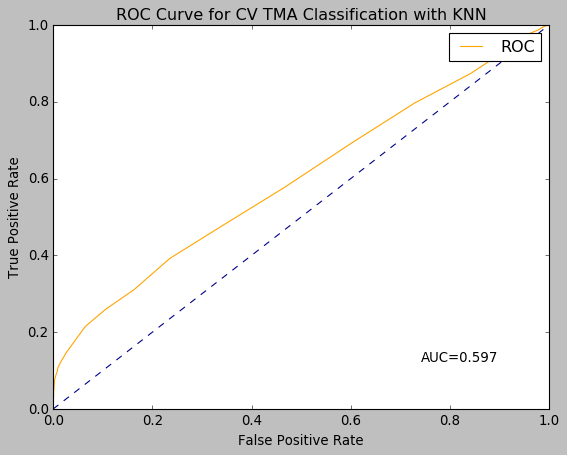

In [168]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [72]:
#Read full tissue spectra in order to apply given TMA class. models to it
onco=pd.read_csv("onco.txt", delimiter='\t', index_col=0)
onco

,m.z,X602.329569609238,X603.353251289886,X604.376932970534,X606.131815851645,X616.417379404823,X617.343567592076,X618.318502526026,X619.342184206674,X620.317119140625,...,X2952.45897464368,X2960.30720086198,X2961.33088254263,X2961.47712278272,X3101.38028580462,X3102.40396748527,X3102.59895447206,tumor_type,subject_ID,tissue_type
1,Spot 1,7.269998,3.764184,1.779937,1.479734,1.553826,1.672309,3.923324,2.356702,1.851078,...,0.713219,0.558826,0.540300,0.553887,0.461969,0.476694,0.583811,Oncocytoma,2,NaN
2,Spot 2,0.508743,0.713295,0.827453,0.468270,0.853420,0.681344,0.617635,0.840286,0.636731,...,0.403060,0.364584,0.370775,0.422585,0.351171,0.377740,0.441661,Oncocytoma,2,NaN
3,Spot 3,6.486244,3.676765,2.552239,4.096031,2.356456,1.551082,3.745872,3.617859,1.984072,...,0.382191,0.333579,0.314135,0.404237,0.353860,0.405182,0.300880,Oncocytoma,2,NaN
4,Spot 4,2.081743,1.188757,0.846792,0.565390,0.750580,1.134875,2.668342,0.895354,1.766416,...,0.700218,0.582676,0.625648,0.701405,0.636884,0.533625,0.709786,Oncocytoma,2,NaN
5,Spot 5,1.567486,1.008587,0.607407,0.592637,1.016887,1.299515,1.496563,0.785080,1.137632,...,0.671320,0.637810,0.566661,0.766580,0.676455,0.585036,0.773459,Oncocytoma,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518153,Spot 518153,2.453640,0.975485,0.952584,0.625409,0.649466,0.859783,1.904737,0.878745,1.388710,...,0.543580,0.571252,0.486338,0.653622,0.589346,0.561318,0.573581,Oncocytoma,10,NaN
518154,Spot 518154,4.452445,1.621141,1.231162,0.674645,0.764160,1.099776,3.041667,1.219699,1.504463,...,0.496838,0.508462,0.548898,0.609129,0.539712,0.536372,0.461282,Oncocytoma,10,NaN
518155,Spot 518155,1.349671,0.767141,0.628065,0.583975,0.655874,0.726557,1.082003,0.763193,0.888925,...,0.629556,0.538704,0.539667,0.601021,0.564184,0.564363,0.564176,Oncocytoma,10,NaN
518156,Spot 518156,1.863345,1.011550,0.806715,0.625088,0.775706,0.842305,1.770343,0.834873,1.429154,...,0.748738,0.575644,0.572694,0.723099,0.560181,0.554489,0.505994,Oncocytoma,10,NaN


In [73]:
#Select labeled spots so that exact accuracy can be computed
select = ['tumor', 'normal'] 
labeled_onco = onco.loc[onco['tissue_type'].isin(select)] 
labeled_onco

,m.z,X602.329569609238,X603.353251289886,X604.376932970534,X606.131815851645,X616.417379404823,X617.343567592076,X618.318502526026,X619.342184206674,X620.317119140625,...,X2952.45897464368,X2960.30720086198,X2961.33088254263,X2961.47712278272,X3101.38028580462,X3102.40396748527,X3102.59895447206,tumor_type,subject_ID,tissue_type
49498,Spot 49498,1.440343,0.813439,0.655844,0.573527,0.714667,0.955381,1.682411,1.064927,1.384536,...,0.928118,0.954897,0.667764,0.794491,0.625842,0.713176,0.731888,Oncocytoma,2,normal
49499,Spot 49499,1.534957,0.948427,0.601714,0.495418,0.581550,0.877644,1.828664,0.866143,1.560050,...,1.044661,0.758412,0.657392,0.797699,0.682733,0.653491,0.769007,Oncocytoma,2,normal
49500,Spot 49500,2.347374,1.169331,0.754657,0.533719,0.710671,0.868694,2.832049,0.915472,1.855402,...,0.918195,0.677340,0.638755,0.801314,0.735055,0.625946,0.570717,Oncocytoma,2,normal
49501,Spot 49501,1.872846,1.079051,0.644956,0.538901,0.701988,1.103904,2.171608,1.022346,1.580894,...,1.212414,0.743006,0.714803,0.927732,0.879321,0.928179,0.595115,Oncocytoma,2,normal
49502,Spot 49502,1.903800,1.257334,0.734060,0.489888,0.677401,0.864524,2.117310,0.974153,1.513752,...,1.013647,0.720163,0.782347,0.948809,0.654514,0.625706,0.683466,Oncocytoma,2,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485575,Spot 485575,0.913892,0.695156,0.589535,0.547784,0.548901,0.635085,0.905551,0.633365,0.736398,...,0.568804,0.530975,0.553406,0.775718,0.629097,0.625438,0.667844,Oncocytoma,10,tumor
485576,Spot 485576,1.348134,0.824478,0.635977,0.575300,0.821046,0.802407,1.387536,0.818904,1.190108,...,0.562465,0.511603,0.625465,0.799687,0.637435,0.539646,0.658856,Oncocytoma,10,tumor
485925,Spot 485925,1.282232,0.793693,0.703407,0.634656,0.711394,0.809901,1.089025,0.837698,1.027825,...,0.613564,0.563908,0.549987,0.751989,0.527759,0.519881,0.778819,Oncocytoma,10,tumor
485926,Spot 485926,2.112358,1.104357,0.744470,0.680496,0.836218,1.115948,2.210373,1.120921,1.690869,...,0.565224,0.531257,0.519792,0.630207,0.512814,0.567965,0.560492,Oncocytoma,10,tumor


In [74]:
#binarize tissue tyep label and drop the rest of the labels
test_onco=labeled_onco['tissue_type'].replace(['normal', 'tumor'],[0,1])
topred_onco=labeled_onco.iloc[:, 1:397]
topred_onco

,X602.329569609238,X603.353251289886,X604.376932970534,X606.131815851645,X616.417379404823,X617.343567592076,X618.318502526026,X619.342184206674,X620.317119140625,X621.340800821273,...,X2886.35838612183,X2950.41161128238,X2951.48403970973,X2952.45897464368,X2960.30720086198,X2961.33088254263,X2961.47712278272,X3101.38028580462,X3102.40396748527,X3102.59895447206
49498,1.440343,0.813439,0.655844,0.573527,0.714667,0.955381,1.682411,1.064927,1.384536,0.806972,...,0.860762,0.819119,0.998928,0.928118,0.954897,0.667764,0.794491,0.625842,0.713176,0.731888
49499,1.534957,0.948427,0.601714,0.495418,0.581550,0.877644,1.828664,0.866143,1.560050,0.816251,...,0.731572,0.846154,0.977925,1.044661,0.758412,0.657392,0.797699,0.682733,0.653491,0.769007
49500,2.347374,1.169331,0.754657,0.533719,0.710671,0.868694,2.832049,0.915472,1.855402,0.990294,...,0.773334,0.716547,1.017082,0.918195,0.677340,0.638755,0.801314,0.735055,0.625946,0.570717
49501,1.872846,1.079051,0.644956,0.538901,0.701988,1.103904,2.171608,1.022346,1.580894,0.861132,...,0.682282,0.855507,1.403249,1.212414,0.743006,0.714803,0.927732,0.879321,0.928179,0.595115
49502,1.903800,1.257334,0.734060,0.489888,0.677401,0.864524,2.117310,0.974153,1.513752,0.892577,...,0.859476,0.735440,1.084398,1.013647,0.720163,0.782347,0.948809,0.654514,0.625706,0.683466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485575,0.913892,0.695156,0.589535,0.547784,0.548901,0.635085,0.905551,0.633365,0.736398,0.647557,...,0.598109,0.581986,0.603402,0.568804,0.530975,0.553406,0.775718,0.629097,0.625438,0.667844
485576,1.348134,0.824478,0.635977,0.575300,0.821046,0.802407,1.387536,0.818904,1.190108,0.752209,...,0.592502,0.582967,0.584873,0.562465,0.511603,0.625465,0.799687,0.637435,0.539646,0.658856
485925,1.282232,0.793693,0.703407,0.634656,0.711394,0.809901,1.089025,0.837698,1.027825,0.750371,...,0.598590,0.587934,0.680369,0.613564,0.563908,0.549987,0.751989,0.527759,0.519881,0.778819
485926,2.112358,1.104357,0.744470,0.680496,0.836218,1.115948,2.210373,1.120921,1.690869,0.973681,...,0.568551,0.533886,0.563104,0.565224,0.531257,0.519792,0.630207,0.512814,0.567965,0.560492


In [75]:
#select columns that appear in both tma and full tissue spectra
X = spectra.iloc[:,0:396]
#binarize tissue type in tma spectra, too
y=spectra['ClassLabel.y'].replace(['normal', 'tumor'],[0,1])

In [76]:
X.shape

(48801, 396)

In [19]:
#fit three class. algorithms to X
rf_clf.fit(X, y)
logisticRegr.fit(X, y)
knn_clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=36, p=2,
                     weights='uniform')

In [33]:
#Predict FullTissue Data with Log Regression
def logreg(topred, test):
    logisticRegr = LogisticRegression(multi_class = 'multinomial')
    logisticRegr.fit(X, y)
    lr_predictions = logisticRegr.predict(topred)
    lr_accuracy=sklearn.metrics.accuracy_score(test, lr_predictions)
    print("LR accuracy:",lr_accuracy)
    misclassified_lr = (test != lr_predictions).sum()
    print('Misclassified samples with Logistic Regression: {}'.format(misclassified_lr))
    return lr_predictions

In [64]:
#Predict FullTissue Data with Random Forest
def randomforest(topred, test):
    rf_clf.fit(X, y)
    rf_predictions = rf_clf.predict(topred)
    rf_accuracy=sklearn.metrics.accuracy_score(test, rf_predictions)
    print("RF accuracy:",rf_accuracy)
    misclassified_rf = (test != rf_predictions).sum()
    print('Misclassified samples with Random Forest: {}'.format(misclassified_rf))
    return rf_predictions

In [77]:
logreg(topred_onco, test_onco)

LR accuracy: 0.7169796871709456
Misclassified samples with Logistic Regression: 14783


array([0, 0, 0, ..., 0, 0, 0])

In [78]:
randomforest(topred_onco, test_onco)

RF accuracy: 0.6286255815289185
Misclassified samples with Random Forest: 19398


array([0, 0, 0, ..., 0, 0, 0])